In [135]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [136]:
wind_atlanta = pd.read_csv('wiatr_atlanta.csv', skiprows=2)
atlanta = pd.read_csv('atlanta.csv', skiprows = 2)
flights = pd.read_csv('flights.csv')

In [137]:
flights = flights.dropna(subset=['dep_delay'])

In [138]:
atlanta_flights = flights[flights.dest == 'ATL']

In [139]:
atlanta_flights = atlanta_flights[['year', 'month', 'day', 'sched_dep_time', 'dep_delay', 'sched_arr_time', 'arr_delay', 'air_time', 'hour', 'minute', 'time_hour', 'name']]

In [140]:
atlanta_flights

,year,month,day,sched_dep_time,dep_delay,sched_arr_time,arr_delay,air_time,hour,minute,time_hour,name
4,2013,1,1,600,-6.0,837,-25.0,116.0,6,0,2013-01-01 06:00:00,Delta Air Lines Inc.
18,2013,1,1,600,0.0,825,12.0,134.0,6,0,2013-01-01 06:00:00,Envoy Air
23,2013,1,1,610,-4.0,845,-8.0,128.0,6,10,2013-01-01 06:00:00,Delta Air Lines Inc.
29,2013,1,1,615,0.0,842,-9.0,120.0,6,15,2013-01-01 06:00:00,Delta Air Lines Inc.
62,2013,1,1,700,-2.0,939,5.0,126.0,7,0,2013-01-01 07:00:00,Delta Air Lines Inc.
...,...,...,...,...,...,...,...,...,...,...,...,...
336621,2013,9,30,1859,4.0,2126,-1.0,101.0,18,59,2013-09-30 18:00:00,AirTran Airways Corporation
336642,2013,9,30,1930,-4.0,2201,-15.0,95.0,19,30,2013-09-30 19:00:00,Delta Air Lines Inc.
336665,2013,9,30,1950,-6.0,2215,-7.0,100.0,19,50,2013-09-30 19:00:00,Envoy Air
336670,2013,9,30,2000,-5.0,2230,-11.0,99.0,20,0,2013-09-30 20:00:00,Delta Air Lines Inc.


In [141]:
atlanta.time = pd.to_datetime(atlanta.time)
wind_atlanta.time = pd.to_datetime(wind_atlanta.time)

In [142]:
atlanta_flights = atlanta_flights.dropna()

In [143]:
# mean_speed = wind_atlanta['wind_speed_10m (km/h)'].mean()
# def add_wind_speed(row):
#     time = pd.to_datetime(row.shed_arrival_time) + pd.to_timedelta(2, unit = 'h')
#     wind_speed = wind_atlanta.loc[wind_atlanta['time'] == time, 'wind_speed_10m (km/h)']
#     if not wind_speed.empty:
#         return wind_speed.values[0]
#     else:
#         return mean_speed

# def add_wind_angle(row):
#     time = pd.to_datetime(row.time_hour) + pd.to_timedelta(2, unit = 'h')
#     wind_angle = wind_atlanta.loc[wind_atlanta['time'] == time, 'wind_direction_10m (°)']
#     if not wind_angle.empty:
#         return wind_angle.values[0]
#     else:
#         return float('nan')

mean_speed = wind_atlanta['wind_speed_10m (km/h)'].mean()
def add_wind_speed(row):
    time = pd.to_datetime(row.shed_arrival_time).floor('H')`
    wind_speed = wind_atlanta.loc[wind_atlanta['time'] == time, 'wind_speed_10m (km/h)']
    if not wind_speed.empty:
        return wind_speed.values[0]
    else:
        return mean_speed

def add_wind_angle(row):
    time = pd.to_datetime(row.shed_arrival_time).floor('H')
    wind_angle = wind_atlanta.loc[wind_atlanta['time'] == time, 'wind_direction_10m (°)']
    if not wind_angle.empty:
        return wind_angle.values[0]
    else:
        return float('nan')

In [144]:
#ADDING META PARAMETRS 
atlanta.time = pd.to_datetime(atlanta.time)

atlanta_flights['time_hour'] = pd.to_datetime(atlanta_flights['time_hour'])
atlanta_flights['shed_arrival_time'] = atlanta_flights.time_hour + pd.to_timedelta(atlanta_flights.minute, unit = 'm') +\
pd.to_timedelta(atlanta_flights.air_time, unit = 'm')

atlanta_flights['wind_speed'] = atlanta_flights.apply(lambda x: add_wind_speed(x), axis=1)
atlanta_flights['wind_angle'] = atlanta_flights.apply(lambda x: add_wind_angle(x), axis=1)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

In [145]:
atlanta_flights = atlanta_flights.dropna()

In [146]:
def find_nearest_hours(row, n):
    shed_time = pd.to_datetime(row.shed_arrival_time)
    year = shed_time.year
    month = shed_time.month
    day = shed_time.day
    hour = shed_time.hour
    
    if n % 2 == 1:
        start_hour = pd.Timestamp(year, month, day, hour, 0)
        if shed_time.minute >= 30:
            start_hour = start_hour + pd.to_timedelta(1, unit = 'h')   
            
        nearest_hours = [start_hour -  pd.to_timedelta(i, unit = 'h') for i in range(n//2 + 1)]
        nearest_hours = nearest_hours[::-1] + [start_hour +  pd.to_timedelta(i, unit = 'h') for i in range(1, n//2 + 1)]
    else:
        nearest_hours = [start_hour -  pd.to_timedelta(i, unit = 'h') for i in range(n//2)]
        nearest_hours = nearest_hours[::-1] + [start_hour +  pd.to_timedelta(i, unit = 'h') for i in range(1, n//2 + 1)]
    
    return nearest_hours

In [147]:
atlanta_flights['nearest_hours'] = atlanta_flights.apply(lambda x: find_nearest_hours(x, 3), axis = 1)

In [148]:
def get_rain_values(row, weather_df):
    nearest_hours = row.nearest_hours
    rain_values = []
    for i_hour in nearest_hours:
        rain_series = weather_df.loc[weather_df['time'] == i_hour, 'rain (mm)']
        if len(rain_series) == 0:
            rain_values.append(0)
        else:
            rain_values.append(rain_series.values[0])
    return rain_values

def get_precipitation_values(row, weather_df):
    nearest_hours = row.nearest_hours
    precipation_values = []
    for i_hour in nearest_hours:
        precipation_series = weather_df.loc[weather_df['time'] == i_hour, 'precipitation (mm)']
        if len(precipation_series) == 0:
            precipation_values.append(0)
        else:
            precipation_values.append(precipation_series.values[0])
    return precipation_values

def get_snowfall_values(row, weather_df):
    nearest_hours = row.nearest_hours
    snowfall_values = []
    for i_hour in nearest_hours:
        snowfall_series = weather_df.loc[weather_df['time'] == i_hour, 'rain (mm)']
        if len(snowfall_series) == 0:
            snowfall_values.append(0)
        else:
            snowfall_values.append(snowfall_series.values[0])
    return snowfall_values

In [149]:
atlanta_flights['rain'] = atlanta_flights.apply(lambda x: get_rain_values(x, atlanta), axis=1)
atlanta_flights['precipation'] = atlanta_flights.apply(lambda x: get_precipitation_values(x, atlanta), axis=1)
atlanta_flights['snow'] = atlanta_flights.apply(lambda x: get_snowfall_values(x, atlanta), axis=1)

In [150]:
atlanta_flights = atlanta_flights.reset_index().drop('index', axis=1)

In [151]:
mean_delay = atlanta_flights['arr_delay'].mean()
atlanta_flights['arr_delay'] = atlanta_flights['arr_delay'].fillna(mean_delay)

mean_air_time = atlanta_flights['air_time'].mean()
atlanta_flights['air_time'] = atlanta_flights['air_time'].fillna(mean_air_time)

In [152]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [153]:
def prepare_data(df, n_hours):
    rain_cols = [f'rain_{i+1}' for i in range(n_hours)]
    precipation_cols = [f'precipation_{i+1}' for i in range(n_hours)]
    snow_cols = [f'snowfall_{i+1}' for i in range(n_hours)]
    
    for i, col in enumerate(rain_cols):
        df[col] = df['rain'].apply(lambda x: x[i] if len(x) > i else 0)
        
    for i, col in enumerate(precipation_cols):
        df[col] = df['precipation'].apply(lambda x: x[i] if len(x) > i else 0)
        
    for i, col in enumerate(snow_cols):
        df[col] = df['snow'].apply(lambda x: x[i] if len(x) > i else 0)   


    # Define input and output variables
    X = df[['name'] + rain_cols + precipation_cols + snow_cols + ['air_time', 'wind_speed', 'wind_angle']]
    Y = df['arr_delay']

    return X, Y

In [154]:
data = atlanta_flights
data['arr_delay'].isna().sum()

0

In [156]:
X, Y = prepare_data(data, 3)

In [158]:
# Encode the categorical variable 'name'
le = LabelEncoder()
X['name'] = le.fit_transform(X['name'])


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [160]:
def train_xgb_model(X_train, y_train, max_depth=15, learning_rate=0.01, n_estimators=100):
    #FUNCTION FOR TRAINING MODEL
    xgb_model = XGBRegressor(max_depth=max_depth, learning_rate=learning_rate, n_estimators=n_estimators)
    xgb_model.fit(X_train, y_train)
    return xgb_model

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [162]:
xgb_model = train_xgb_model(X_train, y_train)

In [163]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"Root Mean Squared Error: {rmse}")
    
def evaluate_mae_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_absolute_error(y_test, y_pred))
    print(f'Mean Absolute Error: {rmse}')

In [164]:
print('XGB Model')
evaluate_mae_model(xgb_model, X_test, y_test)

XGB Model
Mean Absolute Error: 5.087086287458149


In [165]:
import shap
import xgboost
import plotly
import matplotlib.pylab as pl

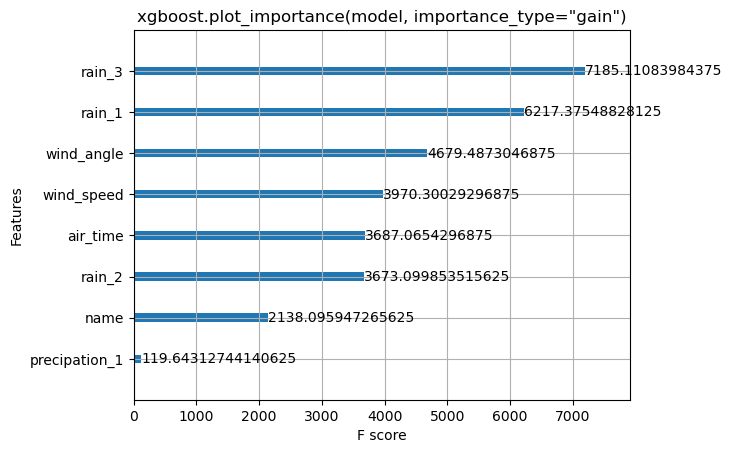

In [166]:
xgboost.plot_importance(xgb_model, importance_type="gain")
pl.title('xgboost.plot_importance(model, importance_type="gain")')
pl.show()

In [167]:
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)

[21:42:38] WARNING: C:\b\abs_0fh_d4x2ng\croot\xgboost-split_1713973188995\work\cpp_src\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


In [168]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0, :], X_test.iloc[0, :])

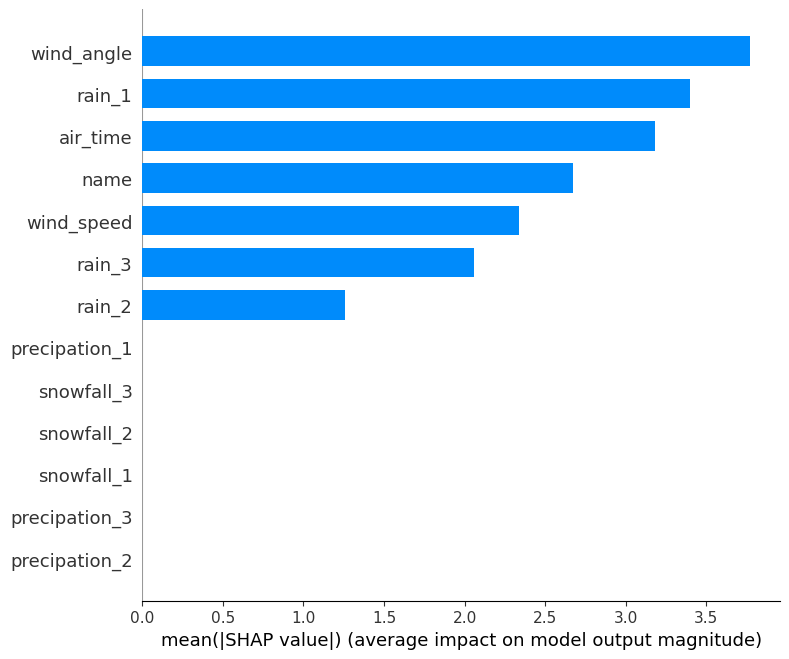

In [170]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

In [171]:
shap.initjs()
shap.force_plot(
    explainer.expected_value, shap_values[:1000, :], X_test.iloc[:1000, :]
)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


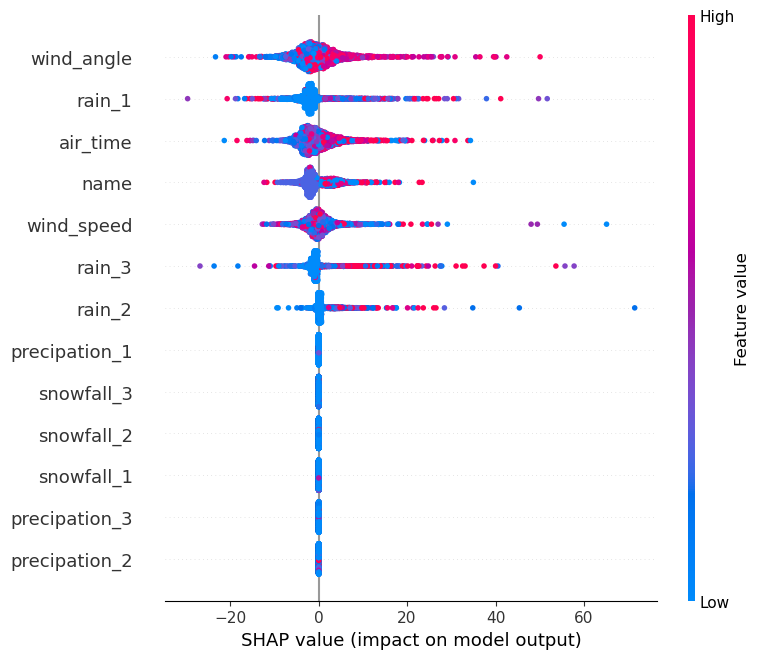

In [181]:
shap.summary_plot(shap_values, X_test)

In [174]:
le.transform(['United Air Lines Inc.'])

#SO 5 IS ENCODED United Air Lines Inc.

array([5])

In [176]:
pogoda_lot = pd.read_csv("open-meteo-33.76N84.40W327m_new.csv", skiprows = 2)
pogoda_lot

,time,temperature_2m (°C),precipitation (mm),rain (mm),snowfall (cm),wind_speed_10m (km/h),wind_direction_10m (°)
0,2024-06-09T00:00,26.8,0.0,0.0,0.0,7.9,227
1,2024-06-09T01:00,25.1,0.0,0.0,0.0,6.8,267
2,2024-06-09T02:00,24.0,0.0,0.0,0.0,5.1,309
3,2024-06-09T03:00,22.4,0.0,0.0,0.0,2.5,98
4,2024-06-09T04:00,21.7,0.0,0.0,0.0,2.4,117
5,2024-06-09T05:00,20.9,0.0,0.0,0.0,2.2,189
6,2024-06-09T06:00,20.4,0.0,0.0,0.0,1.8,259
7,2024-06-09T07:00,19.9,0.0,0.0,0.0,0.5,135
8,2024-06-09T08:00,19.7,0.0,0.0,0.0,1.9,248
9,2024-06-09T09:00,20.0,0.0,0.0,0.0,3.8,287


In [178]:
data = {
    'name': 6,
    'rain_1': 0,
    'rain_2': 0,
    'rain_3': 0,
    'precipation_1': 0,
    'precipation_2': 0,
    'precipation_3': 0,
    'snowfall_1': 0,
    'snowfall_2': 0,
    'snowfall_3': 0,
    'air_time': 143,
    'wind_speed': 11.9,
    'wind_angle': 273
}


my_flight = pd.DataFrame(data, index=[0])

my_flight

,name,rain_1,rain_2,rain_3,precipation_1,precipation_2,precipation_3,snowfall_1,snowfall_2,snowfall_3,air_time,wind_speed,wind_angle
0,6,0,0,0,0,0,0,0,0,0,143,11.9,273


In [179]:
xgb_model.predict(my_flight)

array([32.226948], dtype=float32)

In [180]:
shap.force_plot(explainer.expected_value, explainer.shap_values(my_flight), my_flight)